# Mnist Data Analysis and hypertunning

In [ ]:
from matplotlib import pyplot
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
!pip install keras-tuner

     |████████████████████████████████| 71kB 5.2MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78938 sha256=f2b8abb0e7b0cde7fb7879c237193cf9d64d9f38ff9b11cae4148a7788c057eb
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=8e6d071a200daf15ad2f3c596dc5ea7128763d1f51e5bf9f192986db2746f05d
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


# Fashion-MNIST with Convolutional Neural Networks

In [ ]:
from tensorflow.keras.datasets.fashion_mnist import load_data
(X_train, y_train), (X_test, y_test) = load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


# Fashion-MNIST classication with DNN

In [ ]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [ ]:
X_train[0].shape

(28, 28, 1)

In [ ]:
X_train  = X_train .astype('float32')
X_test = X_test.astype('float32')
X_train = X_train  / 255.0
X_test = X_test / 255.0

In [ ]:
import tensorflow.keras.backend as K
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Flatten, 
                                     Dense, Dropout, BatchNormalization)
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
# these are my helper functions for Keras
#import kr_helper_funcs as kru

IMAGE_HEIGHT, IMAGE_WIDTH, NUM_CHANNELS, NUM_CLASSES = 28, 28, 1, 10

def build_model():
    """
    builds the base Keras model, without any regularization
    """
    K.clear_session()
    
    model = Sequential([
        Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', 
               input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, NUM_CHANNELS)),
        BatchNormalization(),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),        
        MaxPooling2D(pool_size=(2, 2)),
        
        Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(256, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),    
        MaxPooling2D(pool_size=(2, 2)),   
        
        Flatten(),
        
        Dense(1024, activation='relu'),
        
        Dense(512, activation='relu'),
        
        Dense(10, activation='softmax')
    ])
    
    adam = Adam(learning_rate=0.0001, decay=1e-6)
    model.compile(optimizer=adam,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
model_cnn = build_model()
print(model_cnn.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 13, 13, 128)       5

In [ ]:
from keras.callbacks import EarlyStopping
callbacks = EarlyStopping(monitor='loss', mode='min', verbose=1)

In [ ]:
cnn_his=model_cnn.fit(X_train, y_train, epochs=10, validation_split=0.1, callbacks=callbacks )

Epoch 1/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.1186 - accuracy: 0.9555 - val_loss: 0.2694 - val_accuracy: 0.9137
Epoch 2/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0946 - accuracy: 0.9634 - val_loss: 0.2635 - val_accuracy: 0.9200
Epoch 3/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0789 - accuracy: 0.9699 - val_loss: 0.2771 - val_accuracy: 0.9195
Epoch 4/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0624 - accuracy: 0.9762 - val_loss: 0.2664 - val_accuracy: 0.9243
Epoch 5/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0547 - accuracy: 0.9796 - val_loss: 0.3261 - val_accuracy: 0.9205
Epoch 6/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0438 - accuracy: 0.9836 - val_loss: 0.3251 - val_accuracy: 0.9188
Epoch 7/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0398 - accuracy: 0.9849 - val_loss: 0.3736 - val_ac

In [ ]:
model_cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3720 - accuracy: 0.9193


[0.3719954490661621, 0.9193000197410583]

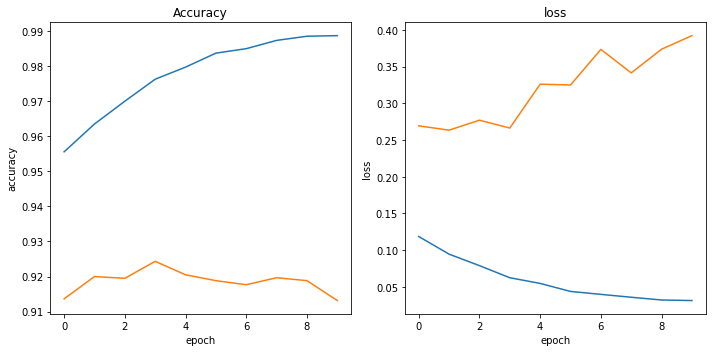

In [ ]:
Fig,axis = plt.subplots(1,2, figsize=(10,5))
# Accuracy
axis[0].plot(cnn_his.history['accuracy'])
axis[0].plot(cnn_his.history['val_accuracy'])
axis[0].set_title('Accuracy')
axis[0].set(xlabel='epoch', ylabel='accuracy')
axis[1].plot(cnn_his.history['loss'])
axis[1].plot(cnn_his.history['val_loss'])
axis[1].set_title('loss')
axis[1].set(xlabel='epoch', ylabel='loss')
plt.tight_layout()

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# Training a ConvNet from scratch

In [ ]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [ ]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [ ]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="Mnist Fashion")

In [ ]:
tuner_search.search(X_train,y_train,epochs=3,validation_split=0.1)

Trial 5 Complete [00h 00m 26s]
val_accuracy: 0.8651666641235352

Best val_accuracy So Far: 0.9144999980926514
Total elapsed time: 00h 02m 37s
INFO:tensorflow:Oracle triggered exit


In [ ]:
model=tuner_search.get_best_models(num_models=1)[0]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 48)        480       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 48)        20784     
_________________________________________________________________
flatten (Flatten)            (None, 27648)             0         
_________________________________________________________________
dense (Dense)                (None, 112)               3096688   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1130      
Total params: 3,119,082
Trainable params: 3,119,082
Non-trainable params: 0
_________________________________________________________________


In [ ]:
his=model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=callbacks)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0366 - accuracy: 0.9868 - val_loss: 0.4436 - val_accuracy: 0.9070
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0278 - accuracy: 0.9900 - val_loss: 0.4555 - val_accuracy: 0.9174
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0220 - accuracy: 0.9921 - val_loss: 0.5038 - val_accuracy: 0.9120
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0174 - accuracy: 0.9939 - val_loss: 0.6026 - val_accuracy: 0.9110
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0168 - accuracy: 0.9939 - val_loss: 0.6307 - val_accuracy: 0.9103
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0158 - accuracy: 0.9945 - val_loss: 0.5926 - val_accuracy: 0.9127
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0129 - accuracy: 0.9957 - val_loss: 0.6176 - val_accuracy:

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.7260 - accuracy: 0.9082


[0.7259809374809265, 0.9082000255584717]

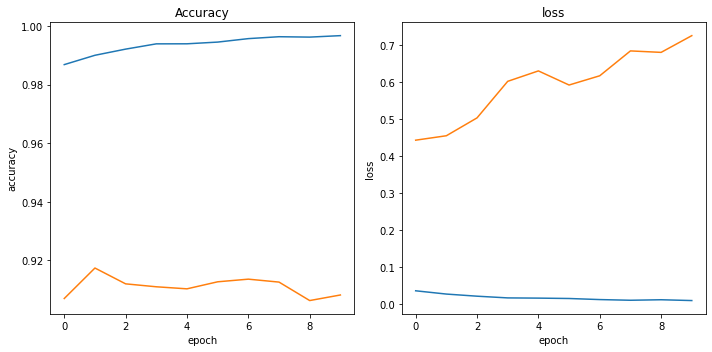

In [ ]:
Fig,axis = plt.subplots(1,2, figsize=(10,5))
# Accuracy
axis[0].plot(his.history['accuracy'])
axis[0].plot(his.history['val_accuracy'])
axis[0].set_title('Accuracy')
axis[0].set(xlabel='epoch', ylabel='accuracy')
axis[1].plot(his.history['loss'])
axis[1].plot(his.history['val_loss'])
axis[1].set_title('loss')
axis[1].set(xlabel='epoch', ylabel='loss')
plt.tight_layout()

# Building an input pipeline for data augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

In [ ]:
datagen = ImageDataGenerator(
    featurewise_center=False,  
    samplewise_center=False, 
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,  
    zca_whitening=False,
    rotation_range=50,
    width_shift_range=0.01, 
    height_shift_range=0.01, 
    horizontal_flip=False, 
    vertical_flip=False)
datagen.fit(X_train)

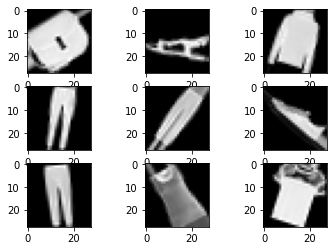

In [ ]:
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

In [ ]:
data_his=model.fit(X_train, y_train, batch_size=32,epochs=10, validation_data=(X_test, y_test), callbacks=callbacks)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0095 - accuracy: 0.9967 - val_loss: 0.8998 - val_accuracy: 0.9028
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0097 - accuracy: 0.9966 - val_loss: 0.8683 - val_accuracy: 0.9039
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0097 - accuracy: 0.9973 - val_loss: 0.8576 - val_accuracy: 0.9130
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0095 - accuracy: 0.9971 - val_loss: 0.8869 - val_accuracy: 0.9128
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0093 - accuracy: 0.9969 - val_loss: 0.8867 - val_accuracy: 0.9079
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0103 - accuracy: 0.9971 - val_loss: 0.9013 - val_accuracy: 0.9101
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0074 - accuracy: 0.9977 - val_loss: 0.9280 - val_accuracy:

In [ ]:
 model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.0523 - accuracy: 0.9107


[1.052303433418274, 0.9107000231742859]

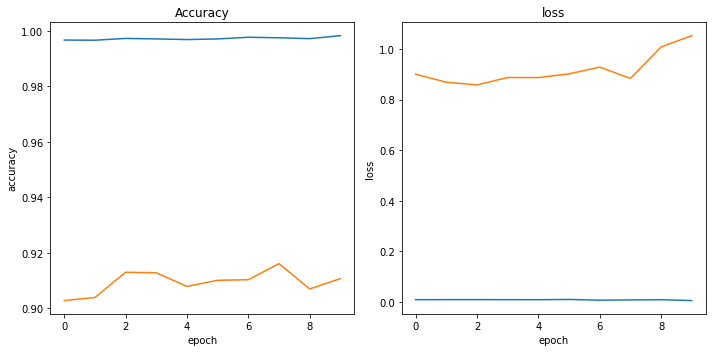

In [ ]:
Fig,axis = plt.subplots(1,2, figsize=(10,5))
axis[0].plot(data_his.history['accuracy'])
axis[0].plot(data_his.history['val_accuracy'])
axis[0].set_title('Accuracy')
axis[0].set(xlabel='epoch', ylabel='accuracy')
axis[1].plot(data_his.history['loss'])
axis[1].plot(data_his.history['val_loss'])
axis[1].set_title('loss')
axis[1].set(xlabel='epoch', ylabel='loss')
plt.tight_layout()

# Fashion-MNIST with transfer learning

In [ ]:
from tensorflow.keras.datasets.fashion_mnist import load_data
(train_images,train_label),(test_images,test_label)=load_data()

In [ ]:
m=60000
x_train = []
y_train = []
x_test = []
y_test = []
tx_train = []
ty_train = []
tx_test = []
ty_test = []
for i in range(m):
    if train_label[i] < 5:
        x_train.append(train_images[i] / 255)
        y_train.append(train_label[i])
    else:
        tx_train.append(train_images[i] / 255)
        ty_train.append(train_label[i])


In [ ]:
m2 = 10000
for i in range(m2):
    if test_label[i] < 5:
        x_test.append(test_images[i] / 255)
        y_test.append(test_label[i])
    else:
        tx_test.append(test_images[i] / 255)
        ty_test.append(test_label[i])
                           

In [5]:
import numpy as np
import keras
import keras.utils
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical

In [ ]:
x_train = np.asarray(x_train).reshape(-1,28,28,1)
x_test = np.asarray(x_test).reshape(-1,28,28,1)
y_train = np_utils.to_categorical(np.asarray(y_train))
y_test = np_utils.to_categorical(np.asarray(y_test))                       
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(30000, 28, 28, 1) (30000, 5)
(5000, 28, 28, 1) (5000, 5)


In [ ]:
tx_train = np.asarray(tx_train).reshape(-1,28,28,1)
tx_test = np.asarray(tx_test).reshape(-1,28,28,1)
ty_train = np_utils.to_categorical(np.asarray(ty_train))
ty_test = np_utils.to_categorical(np.asarray(ty_test))
print(tx_train.shape,ty_train.shape)
print(tx_test.shape,ty_test.shape) 

(30000, 28, 28, 1) (30000, 10)
(5000, 28, 28, 1) (5000, 10)


In [ ]:
from keras.models import Sequential,Model
from keras.layers import Conv2D,Dense,Activation,MaxPool2D,Dropout,Flatten

In [ ]:
tmodel = Sequential()
tmodel.add(Conv2D(32,(5,5),input_shape=(28,28,1),activation='relu'))
tmodel.add(Conv2D(16,(5,5),activation='relu'))
tmodel.add(MaxPool2D(pool_size=(2,2)))
tmodel.add(Conv2D(8,(3,3),activation='relu'))
tmodel.add(Flatten())
tmodel.add(Dropout(0.4))
tmodel.add(Dense(128,activation='relu'))
tmodel.add(Dense(64,activation='relu'))
tmodel.add(Dense(5,activation='softmax'))

In [ ]:
tmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 16)        12816     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 8)           1160      
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               6

In [ ]:
tmodel.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
tmodel.fit(x_train,y_train,
         validation_data=(x_test,y_test),
         epochs=10,
         batch_size=10,
         verbose=2,
         shuffle=True)

Epoch 1/10
3000/3000 - 31s - loss: 0.4009 - accuracy: 0.8464 - val_loss: 0.2690 - val_accuracy: 0.9054
Epoch 2/10
3000/3000 - 8s - loss: 0.2718 - accuracy: 0.9009 - val_loss: 0.2823 - val_accuracy: 0.8930
Epoch 3/10
3000/3000 - 8s - loss: 0.2400 - accuracy: 0.9136 - val_loss: 0.2152 - val_accuracy: 0.9228
Epoch 4/10
3000/3000 - 8s - loss: 0.2212 - accuracy: 0.9206 - val_loss: 0.2297 - val_accuracy: 0.9148
Epoch 5/10
3000/3000 - 8s - loss: 0.2058 - accuracy: 0.9242 - val_loss: 0.1987 - val_accuracy: 0.9296
Epoch 6/10
3000/3000 - 8s - loss: 0.1962 - accuracy: 0.9288 - val_loss: 0.2015 - val_accuracy: 0.9328
Epoch 7/10
3000/3000 - 8s - loss: 0.1922 - accuracy: 0.9300 - val_loss: 0.1881 - val_accuracy: 0.9314
Epoch 8/10
3000/3000 - 8s - loss: 0.1779 - accuracy: 0.9352 - val_loss: 0.1957 - val_accuracy: 0.9296
Epoch 9/10
3000/3000 - 8s - loss: 0.1752 - accuracy: 0.9361 - val_loss: 0.1967 - val_accuracy: 0.9326
Epoch 10/10
3000/3000 - 8s - loss: 0.1670 - accuracy: 0.9401 - val_loss: 0.2034 -

In [ ]:
for layer in tmodel.layers[:5]:
    layer.trainable = False

In [ ]:
x = tmodel.layers[4].output
x = Dropout(0.5)(x)
x = Dense(32,activation='relu')(x)
x = Dense(16,activation='relu')(x)
pred = Dense(10,activation='softmax')(x)

In [ ]:
t_model = Model(tmodel.input,pred)

In [ ]:
t_model.compile(optimizer='adam',
          loss='categorical_crossentropy',
          metrics=['accuracy'])

In [ ]:
t_hist=t_model.fit(tx_train,ty_train,
            validation_data=(tx_test,ty_test),
            batch_size=10,
            epochs=10,
            verbose=2,
            shuffle=True)

Epoch 1/10
3000/3000 - 8s - loss: 0.3251 - accuracy: 0.8880 - val_loss: 0.1711 - val_accuracy: 0.9412
Epoch 2/10
3000/3000 - 6s - loss: 0.2147 - accuracy: 0.9247 - val_loss: 0.1473 - val_accuracy: 0.9492
Epoch 3/10
3000/3000 - 6s - loss: 0.1907 - accuracy: 0.9314 - val_loss: 0.1369 - val_accuracy: 0.9500
Epoch 4/10
3000/3000 - 6s - loss: 0.1778 - accuracy: 0.9367 - val_loss: 0.1337 - val_accuracy: 0.9516
Epoch 5/10
3000/3000 - 6s - loss: 0.1665 - accuracy: 0.9389 - val_loss: 0.1277 - val_accuracy: 0.9552
Epoch 6/10
3000/3000 - 6s - loss: 0.1609 - accuracy: 0.9425 - val_loss: 0.1212 - val_accuracy: 0.9566
Epoch 7/10
3000/3000 - 6s - loss: 0.1570 - accuracy: 0.9426 - val_loss: 0.1305 - val_accuracy: 0.9544
Epoch 8/10
3000/3000 - 6s - loss: 0.1496 - accuracy: 0.9428 - val_loss: 0.1219 - val_accuracy: 0.9578
Epoch 9/10
3000/3000 - 6s - loss: 0.1490 - accuracy: 0.9459 - val_loss: 0.1169 - val_accuracy: 0.9612
Epoch 10/10
3000/3000 - 6s - loss: 0.1439 - accuracy: 0.9474 - val_loss: 0.1179 - 

In [ ]:
t_model.evaluate(tx_test,ty_test)

157/157 [==============================] - 1s 3ms/step - loss: 0.1179 - accuracy: 0.9606


[0.11785180866718292, 0.9606000185012817]

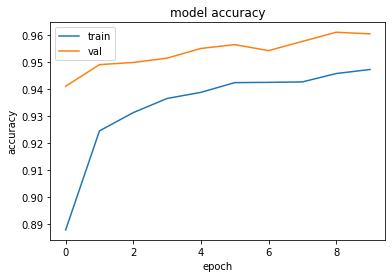

In [ ]:
plt.plot(t_hist.history['accuracy'])
plt.plot(t_hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

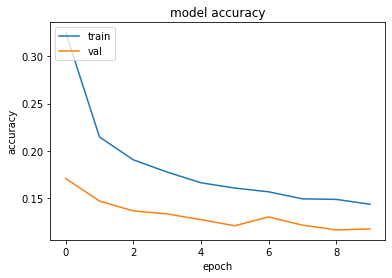

In [ ]:
plt.plot(t_hist.history['loss'])
plt.plot(t_hist.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Performance comparison

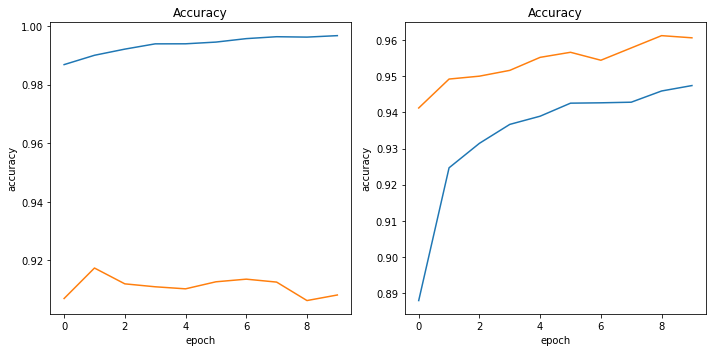

In [ ]:
Fig,axis = plt.subplots(1,2, figsize=(10,5))
#Accuracy
axis[0].plot(his.history['accuracy'])
axis[0].plot(his.history['val_accuracy'])
axis[0].set_title('Accuracy')
axis[0].set(xlabel='epoch', ylabel='accuracy')
axis[1].plot(t_hist.history['accuracy'])
axis[1].plot(t_hist.history['val_accuracy'])
axis[1].set_title('Accuracy')
axis[1].set(xlabel='epoch', ylabel='accuracy')
plt.tight_layout()

# Fast training of deep networks

# Train a highly accurate network for CIFAR10

In [6]:
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

In [7]:
(trainX, trainY), (testX, testY) = cifar10.load_data()
trainY = to_categorical(trainY)
testY = to_categorical(testY)

170508288/170498071 [==============================] - 6s 0us/step


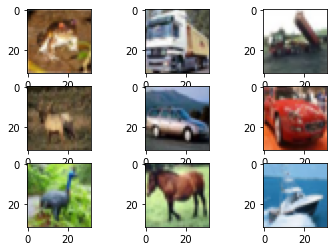

In [8]:
for i in range(9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(trainX[i])
pyplot.show()

In [9]:
def prep_pixels(train, test):
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	return train_norm, test_norm

#Task 2.1.2 Train a "shallow" ConvNet

In [ ]:
cmodel = Sequential()
cmodel.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
cmodel.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
cmodel.add(MaxPooling2D((2, 2)))
cmodel.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
cmodel.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
cmodel.add(MaxPooling2D((2, 2)))
cmodel.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
cmodel.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
cmodel.add(MaxPooling2D((2, 2)))
cmodel.add(Flatten())
cmodel.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
cmodel.add(Dense(10, activation='softmax'))

In [ ]:
opt = SGD(lr=0.001, momentum=0.9)
cmodel.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [10]:
trainX, testX = prep_pixels(trainX, testX)

In [ ]:
history = cmodel.fit(trainX, trainY, epochs=25, batch_size=64, validation_data=(testX, testY))

Epoch 1/25
782/782 [==============================] - 9s 9ms/step - loss: 1.9658 - accuracy: 0.2835 - val_loss: 1.5790 - val_accuracy: 0.4319
Epoch 2/25
782/782 [==============================] - 7s 9ms/step - loss: 1.4136 - accuracy: 0.4939 - val_loss: 1.2738 - val_accuracy: 0.5409
Epoch 3/25
782/782 [==============================] - 7s 8ms/step - loss: 1.2214 - accuracy: 0.5696 - val_loss: 1.1533 - val_accuracy: 0.5975
Epoch 4/25
782/782 [==============================] - 7s 9ms/step - loss: 1.0911 - accuracy: 0.6137 - val_loss: 1.0971 - val_accuracy: 0.6088
Epoch 5/25
782/782 [==============================] - 7s 8ms/step - loss: 0.9904 - accuracy: 0.6535 - val_loss: 1.0210 - val_accuracy: 0.6418
Epoch 6/25
782/782 [==============================] - 7s 9ms/step - loss: 0.9094 - accuracy: 0.6815 - val_loss: 0.9386 - val_accuracy: 0.6741
Epoch 7/25
782/782 [==============================] - 7s 9ms/step - loss: 0.8236 - accuracy: 0.7136 - val_loss: 0.9098 - val_accuracy: 0.6833
Epoch 

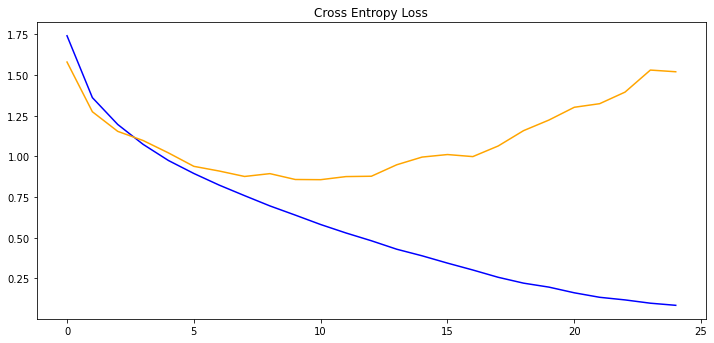

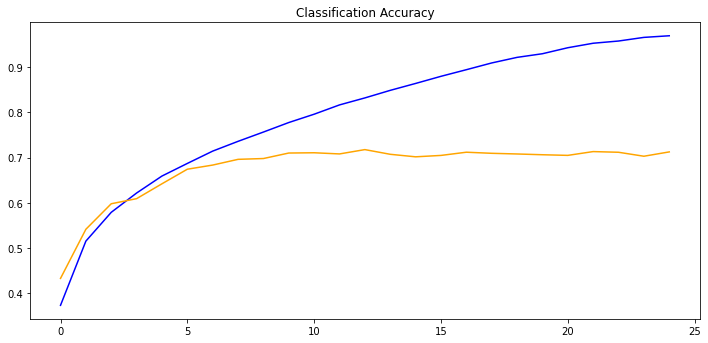

In [ ]:
pyplot.figure(figsize=(12,12))
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
pyplot.figure(figsize=(12,12))
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')

In [ ]:
cmodel.evaluate(testX, testY, verbose=0)

[1.519250750541687, 0.7124999761581421]

# Fast training of ResNet

In [82]:
import keras
from keras import optimizers
from keras.applications.resnet50 import ResNet50
from keras.layers import Dropout, Flatten, Dense
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import tensorflow as tf

In [67]:
base_model = ResNet50(weights= 'imagenet', include_top=False, input_shape= (32,32,3))

In [146]:
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(10, activation='softmax')(x)
model_r = tf.keras.models.Model(inputs=[base_model.input], outputs=[output])

In [132]:
model_r.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [133]:
his_rest=model_r.fit(trainX, trainY, batch_size=64, validation_data=(testX, testY), epochs=20, verbose=1)

Epoch 1/20
782/782 [==============================] - 35s 40ms/step - loss: 2.2036 - accuracy: 0.1954 - val_loss: 2.0085 - val_accuracy: 0.2773
Epoch 2/20
782/782 [==============================] - 30s 38ms/step - loss: 1.9642 - accuracy: 0.2967 - val_loss: 1.8726 - val_accuracy: 0.3357
Epoch 3/20
782/782 [==============================] - 30s 38ms/step - loss: 1.8909 - accuracy: 0.3213 - val_loss: 1.8868 - val_accuracy: 0.3143
Epoch 4/20
782/782 [==============================] - 30s 39ms/step - loss: 1.8636 - accuracy: 0.3336 - val_loss: 1.8049 - val_accuracy: 0.3695
Epoch 5/20
782/782 [==============================] - 30s 38ms/step - loss: 1.8230 - accuracy: 0.3480 - val_loss: 1.8191 - val_accuracy: 0.3503
Epoch 6/20
782/782 [==============================] - 30s 38ms/step - loss: 1.8040 - accuracy: 0.3579 - val_loss: 1.7788 - val_accuracy: 0.3622
Epoch 7/20
782/782 [==============================] - 30s 38ms/step - loss: 1.7861 - accuracy: 0.3653 - val_loss: 1.7862 - val_accuracy:

No handles with labels found to put in legend.
No handles with labels found to put in legend.


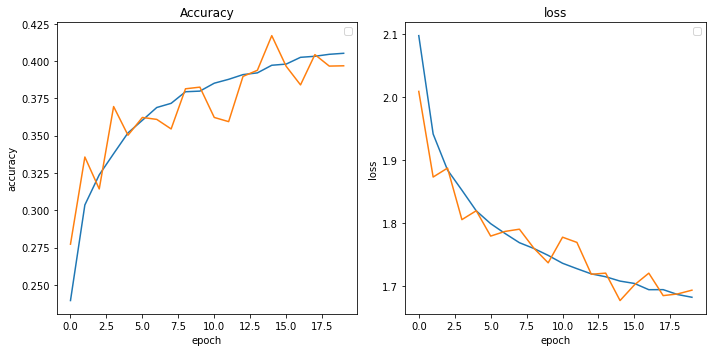

In [137]:
import matplotlib.pyplot as plt
Fig,axis = plt.subplots(1,2, figsize=(10,5))
# Accuracy
axis[0].plot(his_rest.history['accuracy'])
axis[0].plot(his_rest.history['val_accuracy'])
axis[0].legend()
axis[0].set_title('Accuracy')
axis[0].set(xlabel='epoch', ylabel='accuracy')
axis[1].plot(his_rest.history['loss'])
axis[1].plot(his_rest.history['val_loss'])
axis[1].legend()
axis[1].set_title('loss')
axis[1].set(xlabel='epoch', ylabel='loss')
plt.tight_layout()

In [135]:
model_r.evaluate(testX, testY, verbose=0)

[1.6929525136947632, 0.3968000113964081]

#Task 2.3 Performance comparison

No handles with labels found to put in legend.
No handles with labels found to put in legend.


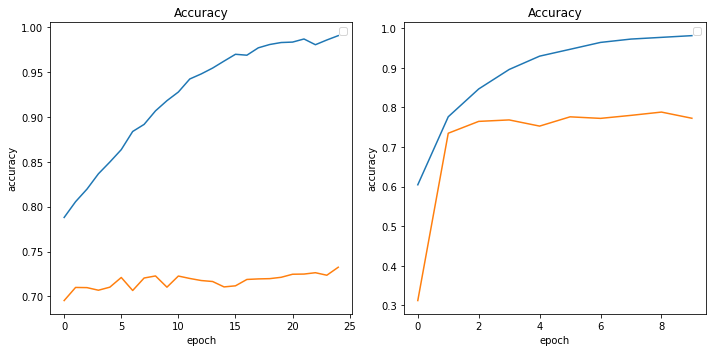

In [ ]:
import matplotlib.pyplot as plt
Fig,axis = plt.subplots(1,2, figsize=(10,5))
# Accuracy
axis[0].plot(history.history['accuracy'])
axis[0].plot(history.history['val_accuracy'])
axis[0].legend()
axis[0].set_title('Accuracy')
axis[0].set(xlabel='epoch', ylabel='accuracy')

axis[1].plot(his_rest.history['accuracy'])
axis[1].plot(his_rest.history['val_accuracy'])
axis[1].legend()
axis[1].set_title('Accuracy')
axis[1].set(xlabel='epoch', ylabel='accuracy')
plt.tight_layout()

# Fine tunning with new Models 

In [ ]:
import tensorflow as tf

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
def H( inputs, num_filters , dropout_rate ):
    x = tf.keras.layers.BatchNormalization( epsilon=eps )( inputs )
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.ZeroPadding2D((1, 1))(x)
    x = tf.keras.layers.Conv2D(num_filters, kernel_size=(3, 3), use_bias=False , kernel_initializer='he_normal' )(x)
    x = tf.keras.layers.Dropout(rate=dropout_rate )(x)
    return x

In [ ]:
def transition(inputs, num_filters , compression_factor , dropout_rate ):
    # compression_factor is the 'θ'
    x = tf.keras.layers.BatchNormalization( epsilon=eps )(inputs)
    x = tf.keras.layers.Activation('relu')(x)
    num_feature_maps = inputs.shape[1] 

    x = tf.keras.layers.Conv2D( np.floor( compression_factor * num_feature_maps ).astype( np.int ) ,
                               kernel_size=(1, 1), use_bias=False, padding='same' , kernel_initializer='he_normal' , kernel_regularizer=tf.keras.regularizers.l2( 1e-4 ) )(x)
    x = tf.keras.layers.Dropout(rate=dropout_rate)(x)
    x = tf.keras.layers.AveragePooling2D(pool_size=(2, 2))(x)
    return x

In [ ]:
def dense_block( inputs, num_layers, num_filters, growth_rate , dropout_rate ):
    for i in range(num_layers): # num_layers is the value of 'l'
        conv_outputs = H(inputs, num_filters , dropout_rate )
        inputs = tf.keras.layers.Concatenate()([conv_outputs, inputs])
        num_filters += growth_rate # To increase the number of filters for each layer.
    return inputs, num_filters

In [ ]:
input_shape = ( 32 , 32 , 3 ) 
num_blocks = 3
num_layers_per_block = 4
growth_rate = 16
dropout_rate = 0.4
compress_factor = 0.5
eps = 1.1e-5
num_filters = 16
inputs = tf.keras.layers.Input( shape=input_shape )
x = tf.keras.layers.Conv2D( num_filters , kernel_size=( 3 , 3 ) , use_bias=False, kernel_initializer='he_normal' , kernel_regularizer=tf.keras.regularizers.l2( 1e-4 ) )( inputs )

for i in range( num_blocks ):
    x, num_filters = dense_block( x, num_layers_per_block , num_filters, growth_rate , dropout_rate )
    x = transition(x, num_filters , compress_factor , dropout_rate )

x = tf.keras.layers.GlobalAveragePooling2D()( x ) 
x = tf.keras.layers.Dense( 10 )( x ) # Num Classes for CIFAR-10
outputs = tf.keras.layers.Activation( 'softmax' )( x )

In [ ]:
model = tf.keras.models.Model( inputs , outputs )
model.compile( loss=tf.keras.losses.categorical_crossentropy ,optimizer=tf.keras.optimizers.Adam( lr=0.0001 ) ,metrics=[ 'acc' ])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 30, 30, 16)   432         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 30, 30, 16)   64          conv2d_11[0][0]                  
__________________________________________________________________________________________________
activation (Activation)         (None, 30, 30, 16)   0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [ ]:
batch_size = 64
epochs = 30
dense_hist=model.fit( x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test,y_test))

Epoch 1/30
782/782 [==============================] - 98s 120ms/step - loss: 2.1523 - acc: 0.1699 - val_loss: 2.3798 - val_acc: 0.2052
Epoch 2/30
782/782 [==============================] - 93s 119ms/step - loss: 1.8826 - acc: 0.3039 - val_loss: 2.1382 - val_acc: 0.2473
Epoch 3/30
782/782 [==============================] - 92s 118ms/step - loss: 1.7458 - acc: 0.3581 - val_loss: 1.6980 - val_acc: 0.3845
Epoch 4/30
782/782 [==============================] - 92s 117ms/step - loss: 1.6455 - acc: 0.4089 - val_loss: 1.7580 - val_acc: 0.3817
Epoch 5/30
782/782 [==============================] - 92s 117ms/step - loss: 1.5660 - acc: 0.4377 - val_loss: 1.7416 - val_acc: 0.4228
Epoch 6/30
782/782 [==============================] - 92s 118ms/step - loss: 1.4872 - acc: 0.4681 - val_loss: 1.6477 - val_acc: 0.4318
Epoch 7/30
782/782 [==============================] - 92s 118ms/step - loss: 1.4257 - acc: 0.4950 - val_loss: 1.6532 - val_acc: 0.4708
Epoch 8/30
782/782 [==============================] - 9

In [ ]:
results = model.evaluate(x_test, y_test, batch_size=batch_size)
print( 'Loss = {} and Accuracy = {} %'.format( results[0],results[1]*100))

157/157 [==============================] - 5s 30ms/step - loss: 1.4110 - acc: 0.6396
Loss = 1.4109834432601929 and Accuracy = 63.95999789237976 %


No handles with labels found to put in legend.
No handles with labels found to put in legend.


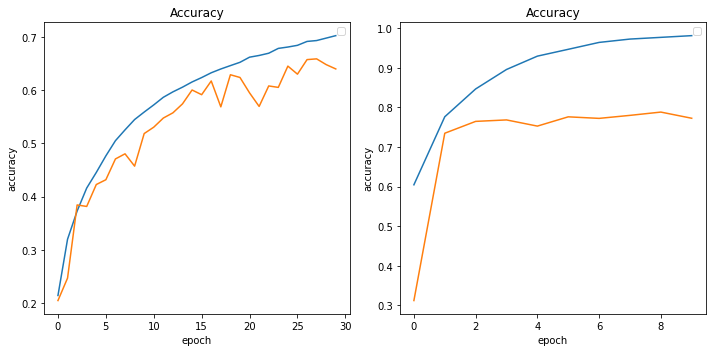

In [ ]:
import matplotlib.pyplot as plt
Fig,axis = plt.subplots(1,2, figsize=(10,5))
# Accuracy
axis[0].plot(dense_hist.history['acc'])
axis[0].plot(dense_hist.history['val_acc'])
axis[0].legend()
axis[0].set_title('Accuracy')
axis[0].set(xlabel='epoch', ylabel='accuracy')

axis[1].plot(his_rest.history['accuracy'])
axis[1].plot(his_rest.history['val_accuracy'])
axis[1].legend()
axis[1].set_title('Accuracy')
axis[1].set(xlabel='epoch', ylabel='accuracy')
plt.tight_layout()